In [277]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import math
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
from sklearn import metrics
import ensemble

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Resolva o problema de classificação binária sobre o dataset "Pima Indians Diabetes Database".

In [278]:
diabetes = pd.read_csv("dataset/diabetes.csv")
print(diabetes.shape)
diabetes.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 1. Separe os dados em treino (80%) e teste (20%)

In [279]:
y = diabetes['Outcome'].values
X = diabetes.copy()
del X['Outcome']
X = X.values
print(y.shape)
print(X.shape)

(768,)
(768, 8)


In [280]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

## 2. Crie um modelo de árvore de decisão sobre o conjunto de treino e faça o que se pede:

In [281]:
dt_model = tree.DecisionTreeClassifier(random_state=42)

In [282]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### Mostre a importância das features.

In [283]:
dt_model.feature_importances_

array([0.05748153, 0.31422474, 0.14767907, 0.06116378, 0.06625279,
       0.17070035, 0.08328237, 0.09921536])

### Desenhe a árvore de decisão.

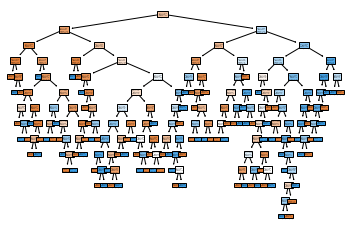

In [284]:
tree.plot_tree(dt_model, filled=True);

### Calcule e mostre F1-Score sobre os dados de treino e sobre os dados de teste.

In [285]:
y_pred_train = dt_model.predict(X_train)
y_pred_train

array([0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,

In [286]:
print(metrics.f1_score(y_train, y_pred_train))

1.0


In [287]:
y_pred_test = dt_model.predict(X_test)
y_pred_test

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
      dtype=int64)

In [288]:
print(metrics.f1_score(y_test, y_pred_test))

0.6722689075630253


## 3. Crie um modelo ensemble de Votação (MajorityVoteClassifier) sobre o conjunto de treino usando pelo menos 3 algoritmos de aprendizado de máquina. Compare o resultado de usar os modelos isoladamente com o resultado usando o MajorityVoteClassifier sobre o conjunto de teste usando a métrica F1-Score. Não precisa usar k-Fold Cross Validation.

In [289]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("F1 Score: %0.2f - %s" % (metrics.f1_score(y_test, y_pred_lr), "Logistic regression"))

dt = tree.DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("F1 Score: %0.2f - %s" % (metrics.f1_score(y_test, y_pred_dt), "Decision tree"))

knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("F1 Score: %0.2f - %s" % (metrics.f1_score(y_test, y_pred_knn), "KNN"))

F1 Score: 0.65 - Logistic regression
F1 Score: 0.67 - Decision tree
F1 Score: 0.64 - KNN


In [290]:
mv_clf = ensemble.MajorityVoteClassifier(classifiers=[lr, dt, knn])
mv_clf.fit(X_train, y_train)
y_pred_mv = mv_clf.predict(X_test)
print("F1 Score: %0.2f - %s" % (metrics.f1_score(y_test, y_pred_mv), "Majority voting"))

F1 Score: 0.67 - Majority voting


## 4. Avalie agora as técnicas de Bagging (BaggingClassifier) usando árvores de decisão (DecisionTreeClassifier), RandomForest, AdaBoost e GradientBoosting sobre o conjunto de teste usando a métrica F1-Score. Mostre também a importância das features para cada uma das técnicas.

In [291]:
dt = tree.DecisionTreeClassifier(random_state=42)

bc = BaggingClassifier(base_estimator=dt, n_estimators=300, n_jobs=-1)
bc.fit(X_train, y_train)

y_pred_bc = bc.predict(X_test)

score = metrics.f1_score(y_test, y_pred_bc)
print('F1 Score of Bagging Classifier: {:.3f}'.format(score))

importances = np.mean([tree.feature_importances_ for tree in bc.estimators_], axis=0)
print("Feature Importances: ", importances)

F1 Score of Bagging Classifier: 0.673
Feature Importances:  [0.05226411 0.32897534 0.09135374 0.05652896 0.05703103 0.16032744
 0.12010163 0.13341775]


In [292]:
rf = RandomForestClassifier(n_estimators=400, random_state=42)

bc = BaggingClassifier(base_estimator=rf)
bc.fit(X_train, y_train)

y_pred_bc = bc.predict(X_test)

score = metrics.f1_score(y_test, y_pred_bc)
print('F1 Score of Bagging Classifier: {:.3f}'.format(score))

importances = np.mean([tree.feature_importances_ for tree in bc.estimators_], axis=0)
print("Feature Importances: ", importances)

F1 Score of Bagging Classifier: 0.637
Feature Importances:  [0.08153854 0.25304526 0.08751903 0.07431041 0.0718441  0.16313754
 0.11795988 0.15064525]


In [293]:
ab = AdaBoostClassifier(n_estimators=100, random_state=42)

bc = BaggingClassifier(base_estimator=ab)
bc.fit(X_train, y_train)

y_pred_bc = bc.predict(X_test)

score = metrics.f1_score(y_test, y_pred_bc)
print('F1 Score of Bagging Classifier: {:.3f}'.format(score))

importances = np.mean([tree.feature_importances_ for tree in bc.estimators_], axis=0)
print("Feature Importances: ", importances)

F1 Score of Bagging Classifier: 0.611
Feature Importances:  [0.045 0.196 0.081 0.071 0.098 0.197 0.21  0.102]


In [294]:
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)

bc = BaggingClassifier(base_estimator=gb)
bc.fit(X_train, y_train)

y_pred_bc = bc.predict(X_test)

score = metrics.f1_score(y_test, y_pred_bc)
print('F1 Score of Bagging Classifier: {:.3f}'.format(score))

importances = np.mean([tree.feature_importances_ for tree in bc.estimators_], axis=0)
print("Feature Importances: ", importances)

F1 Score of Bagging Classifier: 0.679
Feature Importances:  [0.03747798 0.38030029 0.05218769 0.0377853  0.05276158 0.17450022
 0.10749749 0.15748945]
